# EDA
1. This section performs exploratory data analysis

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as sm

import os; import sys
sys.path.append('/home/mitch/school/ENIGH/src/')
import sys; sys.path.append('/home/mitch/util/python')

In [3]:
processed = '/home/mitch/Dropbox/data/mexico_enigh/processed2/'

figs    = '/home/mitch/github/ENIGH/fig/'
dicts   = '/home/mitch/github/ENIGH/dicts/'

In [4]:
df = pd.read_csv(processed + 'data.csv')
df

consumption_education  consumption_personal  income_transfers  \
0                   3.997176              2.776740           0.00000   
1                   1.278687              3.248377           0.00000   
2                   4.547267              5.401430          14.83277   
3                   7.893182              1.282063           0.00000   
4                  12.794969             11.995534           0.00000   
...                      ...                   ...               ...   
20541               3.890832              1.921662           0.00000   
20542               0.285046              0.830044           0.00000   
20543               1.235198              1.477268           0.00000   
20544               2.882129             16.855481           0.00000   
20545               3.559501              1.340223           0.00000   

       income_other  consumption_clothing  location_size  consumption_food  \
0               0.0              4.182728              1          5.867128   
1               0.0              3.667275              1         17.903154   
2               0.0              5.225568              1         12.873225   
3               0.0              0.102295              1         20.684452   
4               0.0             11.346217              1         35.560885   
...             ...                   ...            ...               ...   
20541           0.0              0.498830              1         14.840565   
20542           0.0              0.285046              1          8.360638   
20543           0.0              0.408860              1          3.824656   
20544           0.0              2.299444              2         18.984631   
20545           0.0              0.403838              1          9.492550   

       consumption_current  financial_income  weight  ...  \
0                34.000119          9.547530   169.0  ...   
1                44.265249          0.000000   169.0  ...   
2                55.064614          0.000000   169.0  ...   
3                55.399681          2.045899   153.0  ...   
4               122.300197          4.262290   153.0  ...   
...                    ...               ...     ...  ...   
20541            31.639798          0.000000  1351.0  ...   
20542            25.491084          0.000000  1351.0  ...   
20543            11.946668          0.805555  1351.0  ...   
20544            89.016606          4.699073  1077.0  ...   
20545            33.806916          0.000000  2140.0  ...   

       has_income_interest_fixed_investments  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
...                                      ...   
20541                                    0.0   
20542                                    0.0   
20543                                    0.0   
20544                                    0.0   
20545                                    0.0   

       has_income_interest_loans_to_third_parties  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
...                                           ...   
20541                                         0.0   
20542                                         0.0   
20543                                         0.0   
20544                                         0.0   
20545                                         0.0   

       has_income_interest_savings_accounts  has_income_interest_shares_bonds  \
0                                       0.0                               0.0   
1                                       0.0                               0.0   
2              

In [5]:
df['post'] = df['Y'] == 1996
income = ['income_salary', 'income_business', 'income_transfers']
df['income'] = df[income].sum(axis=1)
df['log_income'] = np.log(df['income'])

consumption = ['consumption_food', 'consumption_personal', 'consumption_clothing']
df['consumption'] = df[consumption].sum(axis=1)
df['log_consumption'] = np.log(df['consumption'])

/home/mitch/anaconda3/envs/main/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mitch/anaconda3/envs/main/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
df = (df.query('income > 0')
      .query('consumption > 0'))

In [7]:
from statsmodels.stats.weightstats import DescrStatsW
q_995 = DescrStatsW(df['income'], df['weight']).quantile(0.995).iloc[0]
df = df.query('income < @q_995')

from statsmodels.stats.weightstats import DescrStatsW
q_995 = DescrStatsW(df['consumption'], df['weight']).quantile(0.995).iloc[0]
df = df.query('consumption < @q_995')

/home/mitch/anaconda3/envs/main/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:308: FutureWarning: The provided callable <function sum at 0x7fd32c539940> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dfg = df.groupby("vec").agg(np.sum)
/home/mitch/anaconda3/envs/main/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:308: FutureWarning: The provided callable <function sum at 0x7fd32c539940> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dfg = df.groupby("vec").agg(np.sum)


# Gender

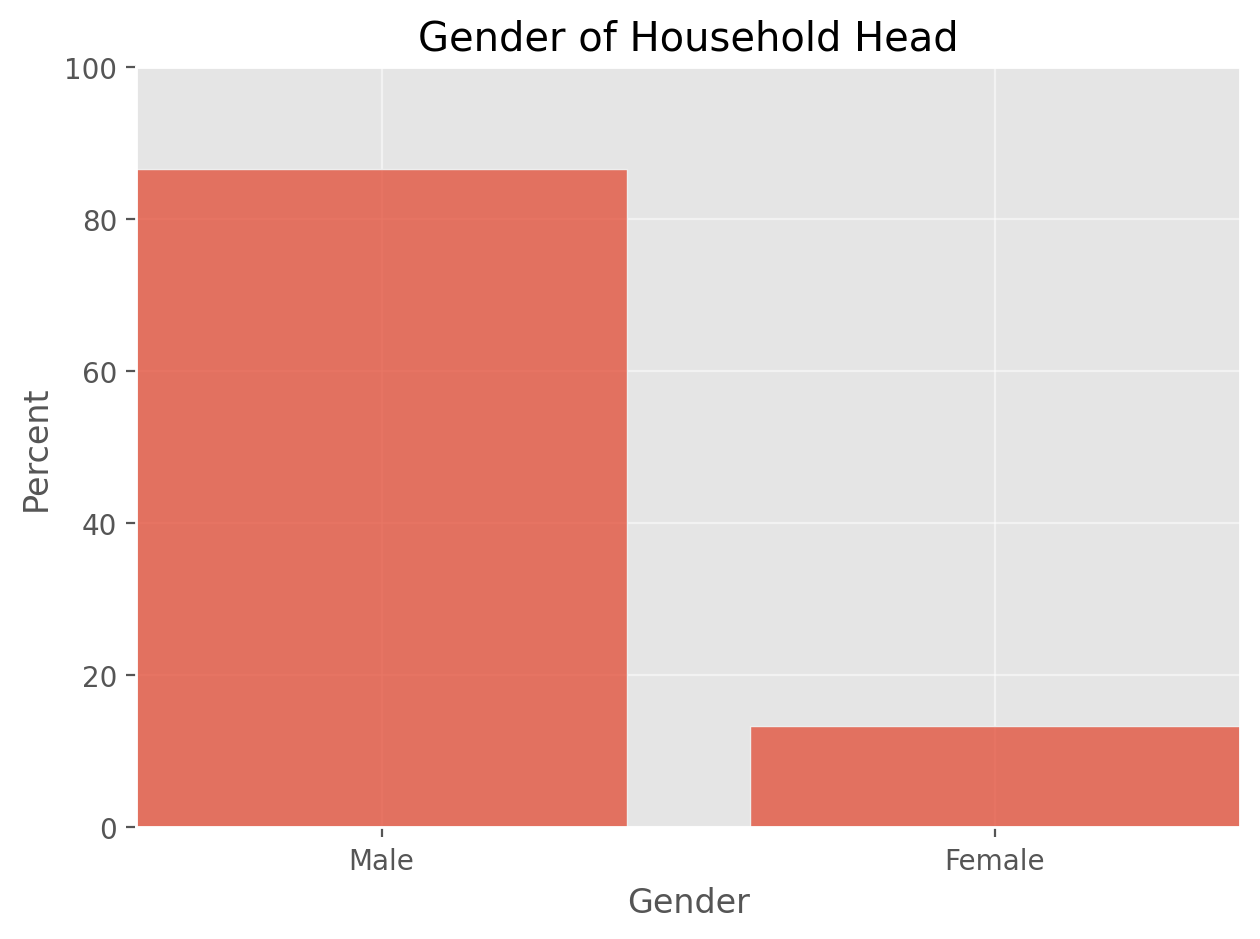

In [8]:
plt.clf()
ax = sns.histplot(df, x='sex', 
             stat='percent', 
             weights='weight',
             shrink=0.8)
ax.set_xlabel('Gender')
ax.set_ylim(0, 100)
plt.title('Gender of Household Head')
plt.show()

# Education

In [9]:
education = df.groupby('education')['weight'].sum() / df['weight'].sum()
education

education
High      0.127703
Low       0.600492
Medium    0.271805
Name: weight, dtype: float64

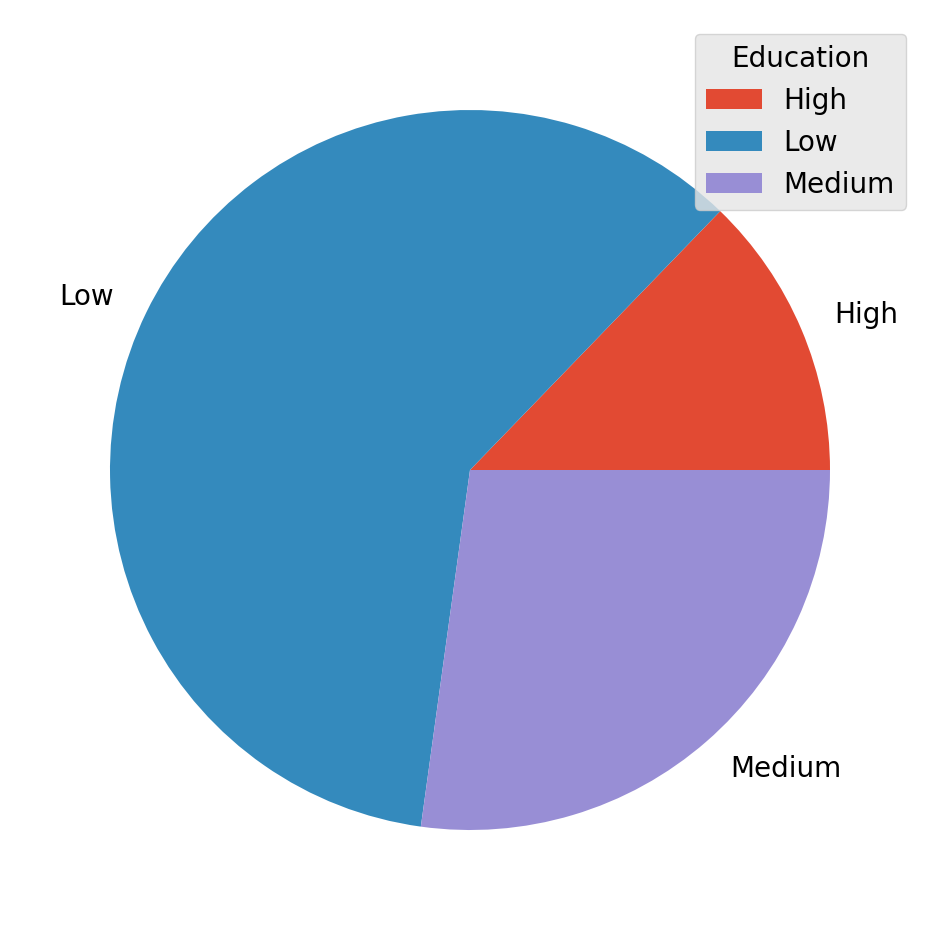

In [10]:
plt.pie(education, labels=education.index)
plt.legend(title='Education')

In [11]:
education_by_gender = 100 * pd.crosstab(df.education, df.sex, df.weight, aggfunc='sum', normalize='index')
education_by_gender.reset_index(inplace=True)
education_by_gender = education_by_gender.melt(id_vars='education', value_name='Percent')

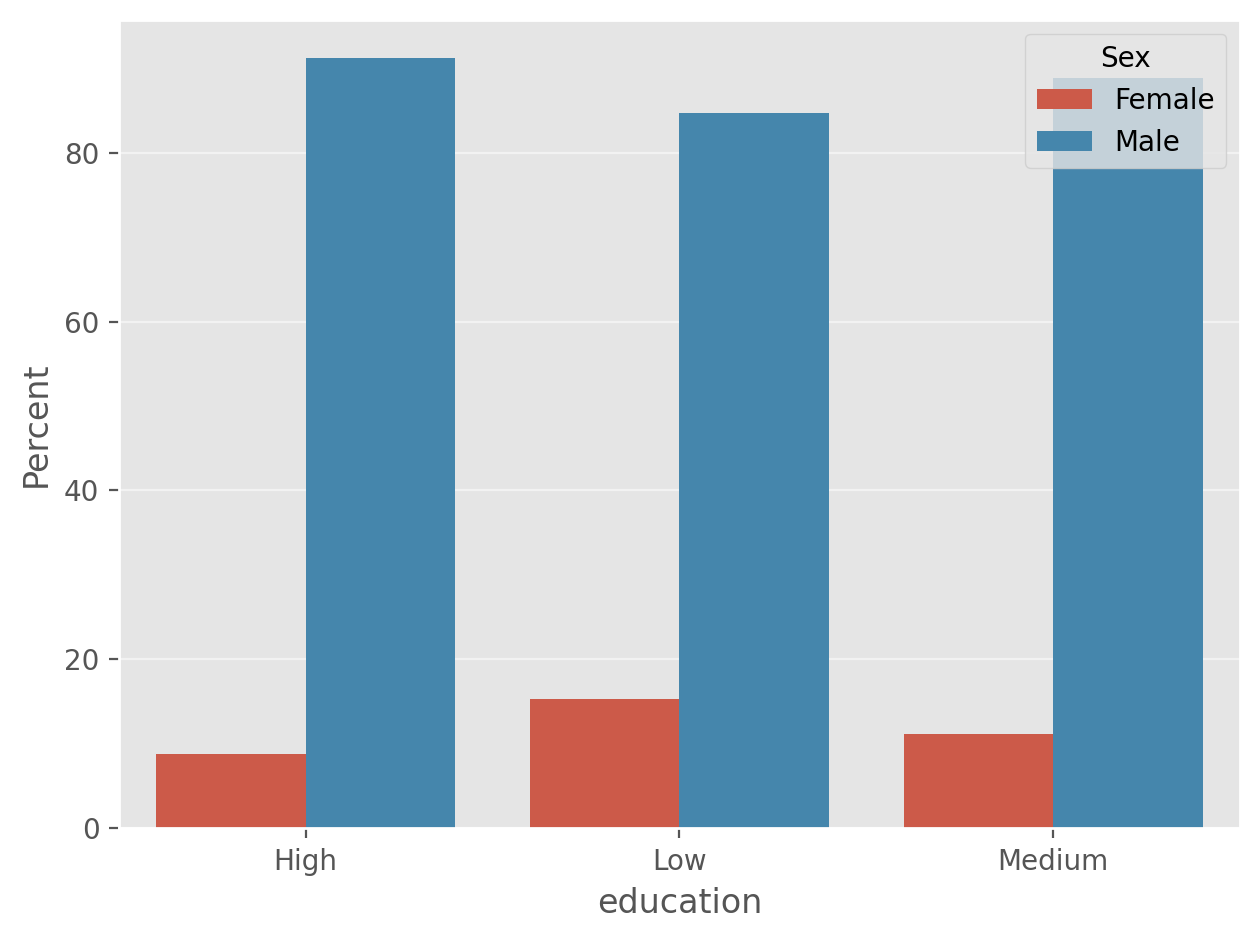

In [12]:
sns.barplot(education_by_gender, x='education', y='Percent', hue='sex')
plt.legend(title='Sex');

In [13]:
education_by_location = 100 * pd.crosstab(df.location_size, df.education, df.weight, aggfunc='sum', normalize='index')
education_by_location.reset_index(inplace=True)
education_by_location = education_by_location.melt(id_vars='location_size', value_name='Percent')

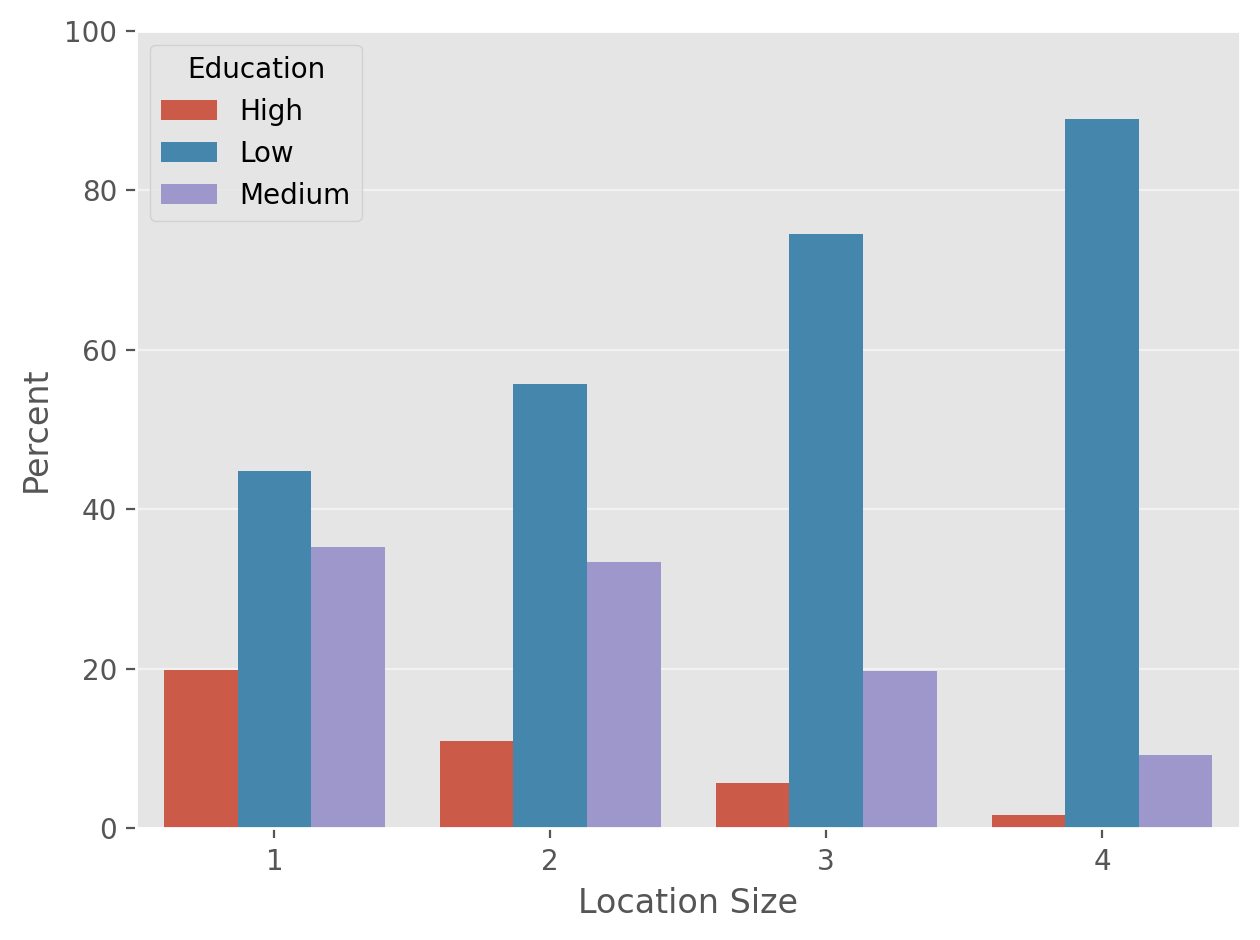

In [14]:
sns.barplot(education_by_location, x='location_size', y='Percent', hue='education')
plt.xlabel('Location Size')
plt.legend(title='Education')
plt.ylim(0, 100);

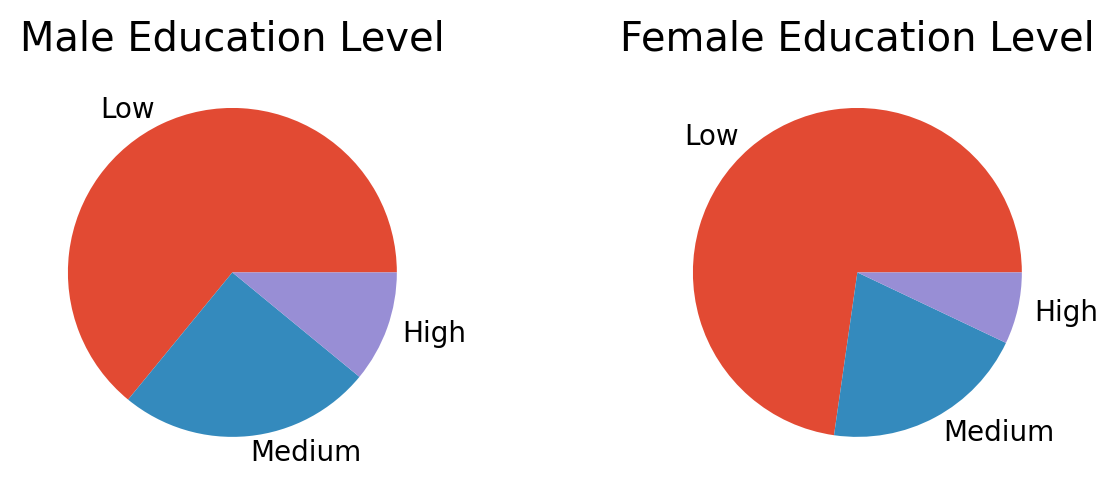

In [15]:
plt.clf()

plt.subplot(221)
male = df.query("sex == 'Male'").education.value_counts()
plt.pie(male, labels=[x.title() for x in male.index])
plt.title('Male Education Level')

plt.subplot(222)
female = df.query("sex == 'Female'").education.value_counts()
plt.pie(female, labels=[x.title() for x in female.index])
plt.title('Female Education Level')

plt.show()

# Income

/tmp/ipykernel_90092/2381522298.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.income, bins=20, hist_kws={'weights':df.weight})
/tmp/ipykernel_90092/2381522298.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.consumption, bins=20, hist_kws={'weights':df.weight})


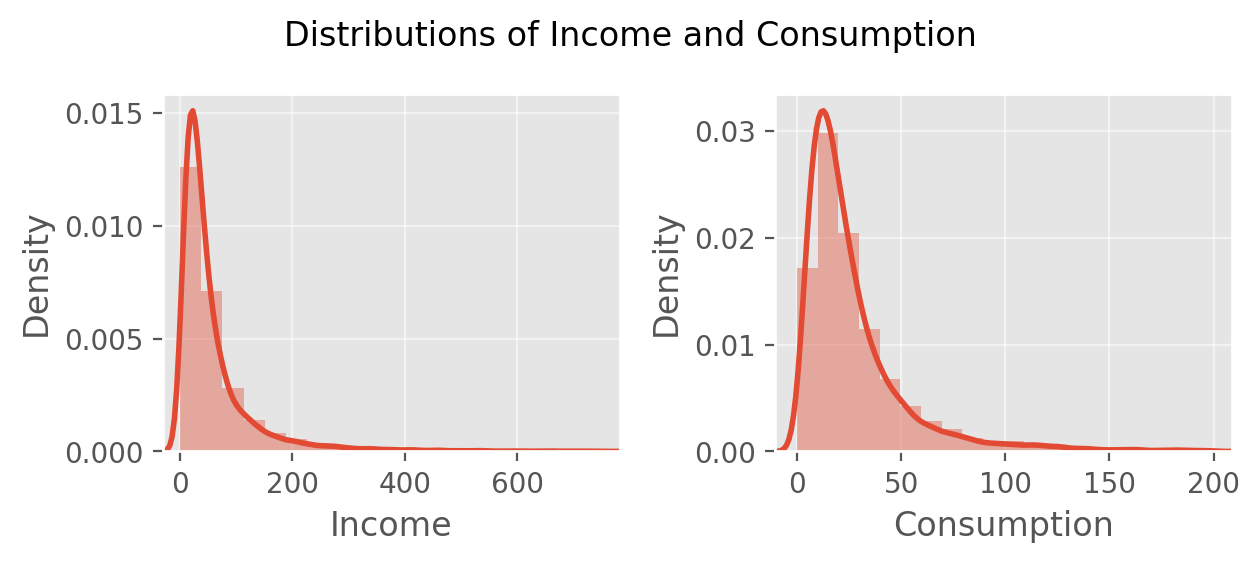

In [16]:
plt.subplot(221)
sns.distplot(df.income, bins=20, hist_kws={'weights':df.weight})
plt.xlabel('Income')

plt.subplot(222)
sns.distplot(df.consumption, bins=20, hist_kws={'weights':df.weight})
plt.xlabel('Consumption')

plt.suptitle('Distributions of Income and Consumption');

/tmp/ipykernel_90092/3428999311.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.log_income, bins=20, hist_kws={'weights':df.weight})
/tmp/ipykernel_90092/3428999311.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.log_consumption, bins=20, hist_kws={'weights':df.weight})


Text(0.5, 0.98, 'Log Distributions of Income and Consumption')

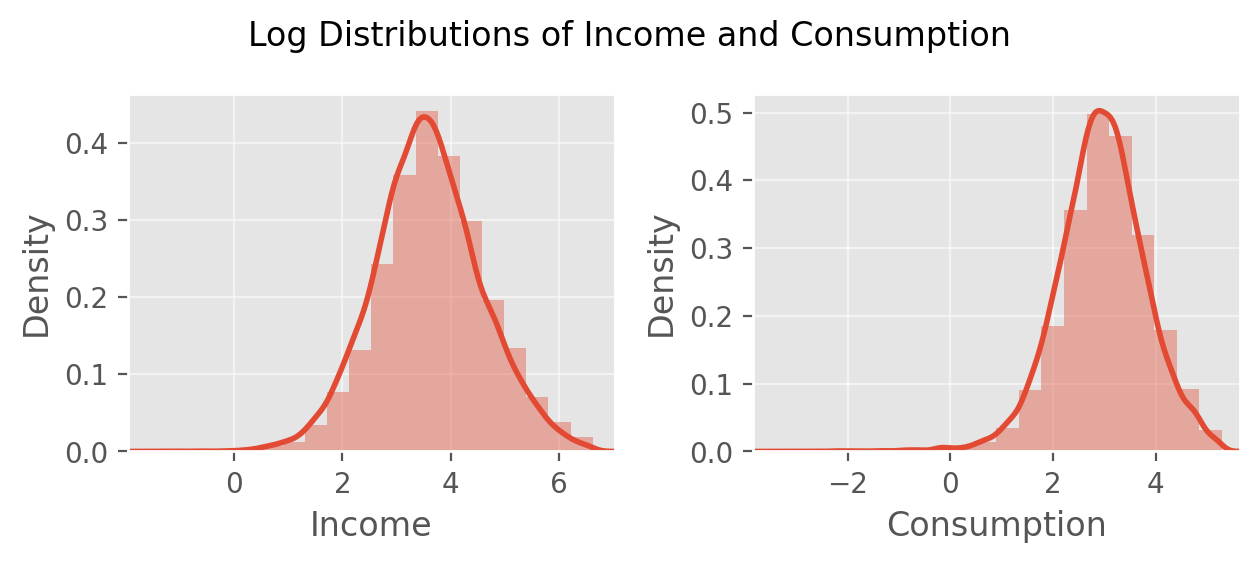

In [17]:
plt.subplot(221)
sns.distplot(df.log_income, bins=20, hist_kws={'weights':df.weight})
plt.xlabel('Income')

plt.subplot(222)
sns.distplot(df.log_consumption, bins=20, hist_kws={'weights':df.weight})
plt.xlabel('Consumption')

plt.suptitle('Log Distributions of Income and Consumption')

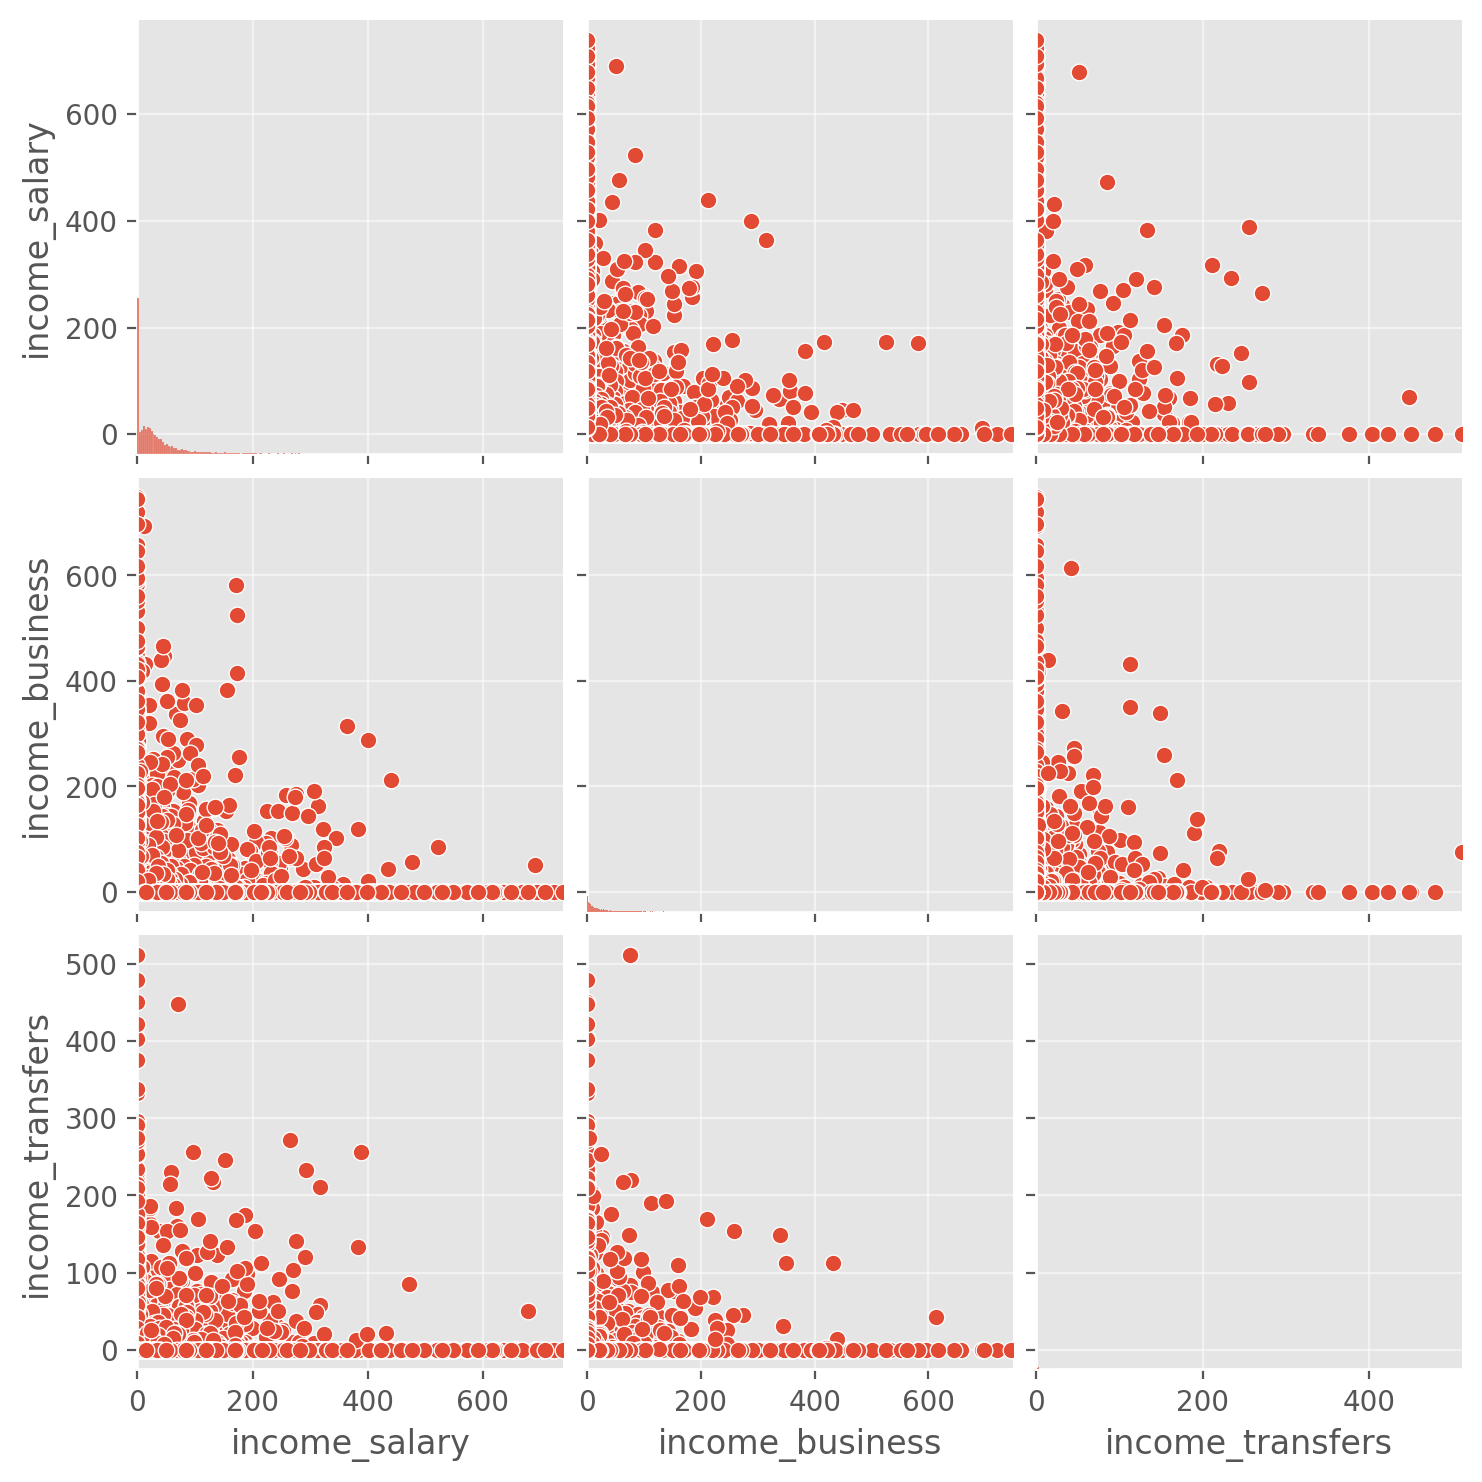

In [106]:
income_columns = ['income_salary', 'income_business', 'income_transfers']
sns.pairplot(df[income_columns])

/home/mitch/anaconda3/envs/main/lib/python3.9/site-packages/pandas/core/algorithms.py:1814: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(values, mapper, convert=convert)


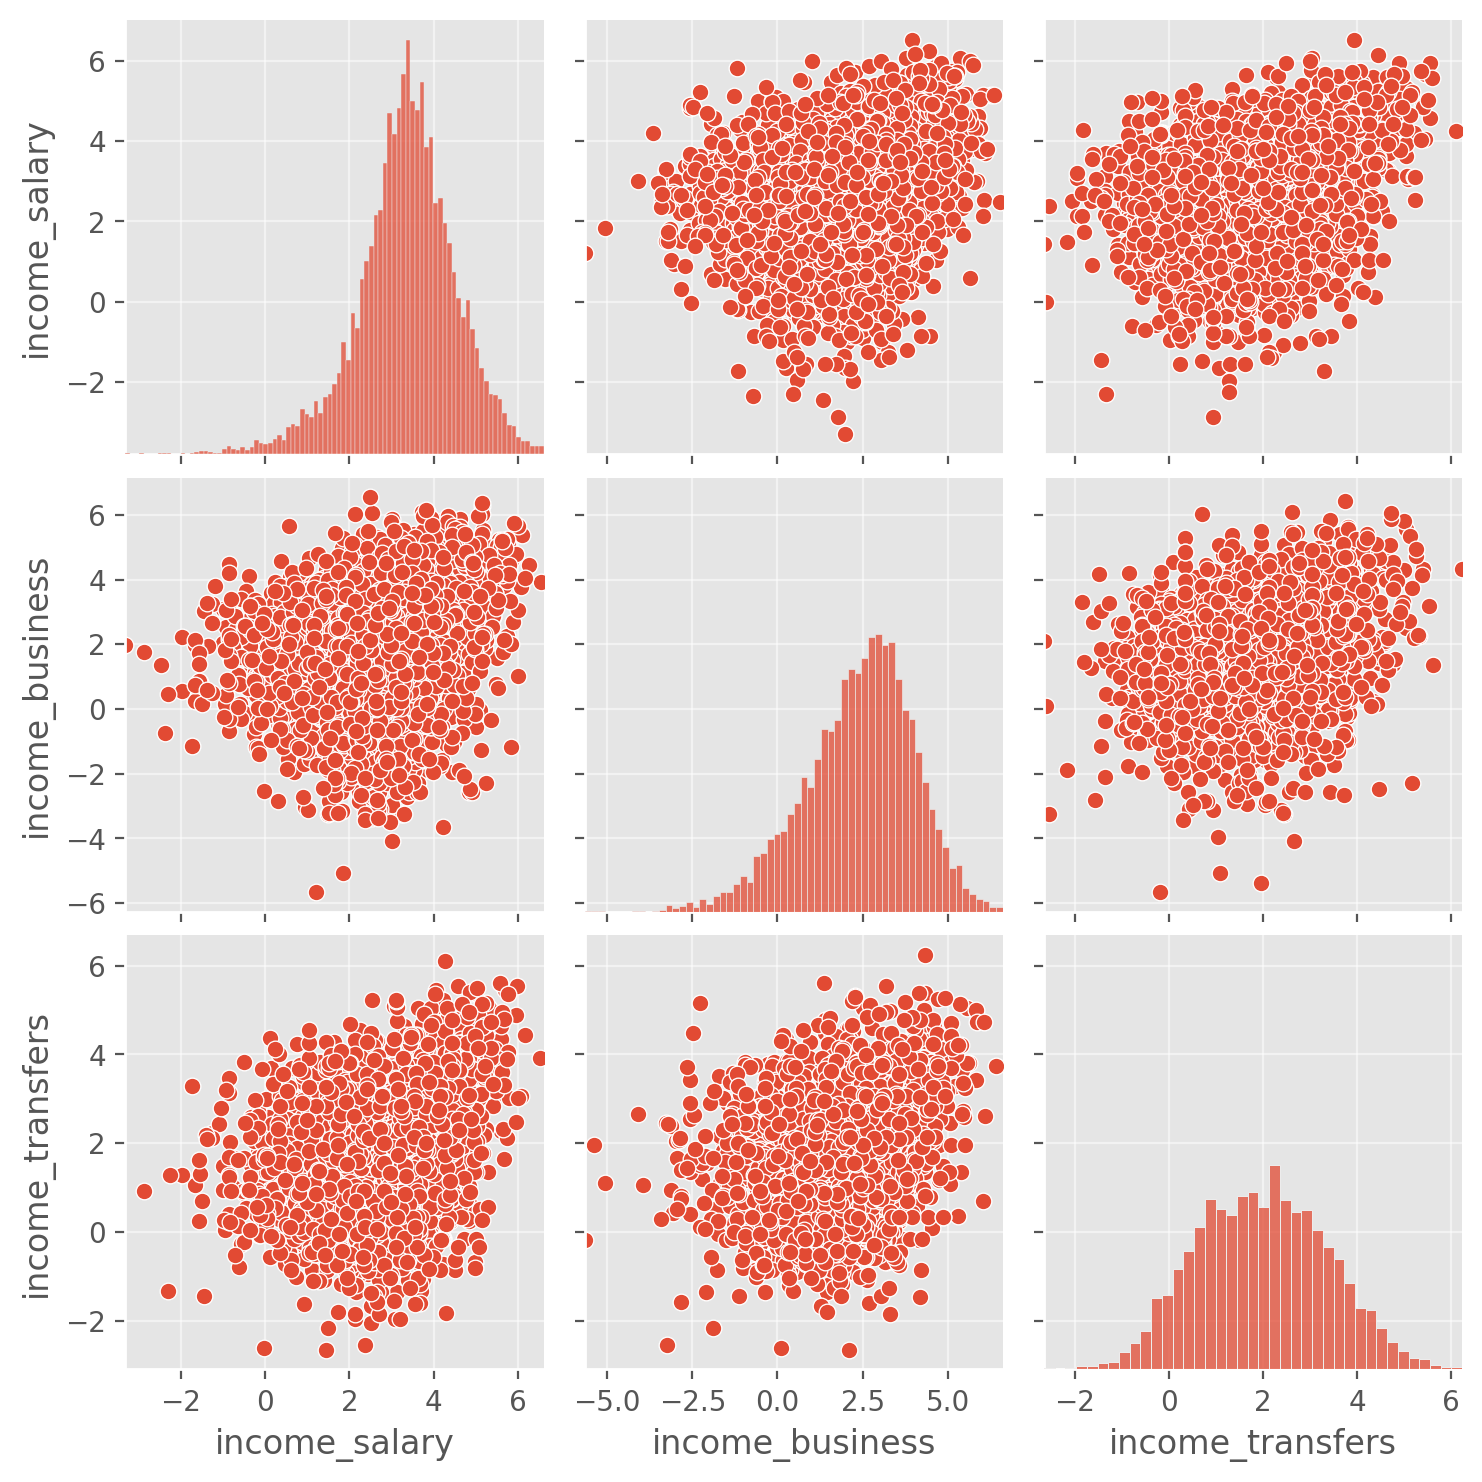

In [109]:
sns.pairplot(df[income_columns].map(np.log))

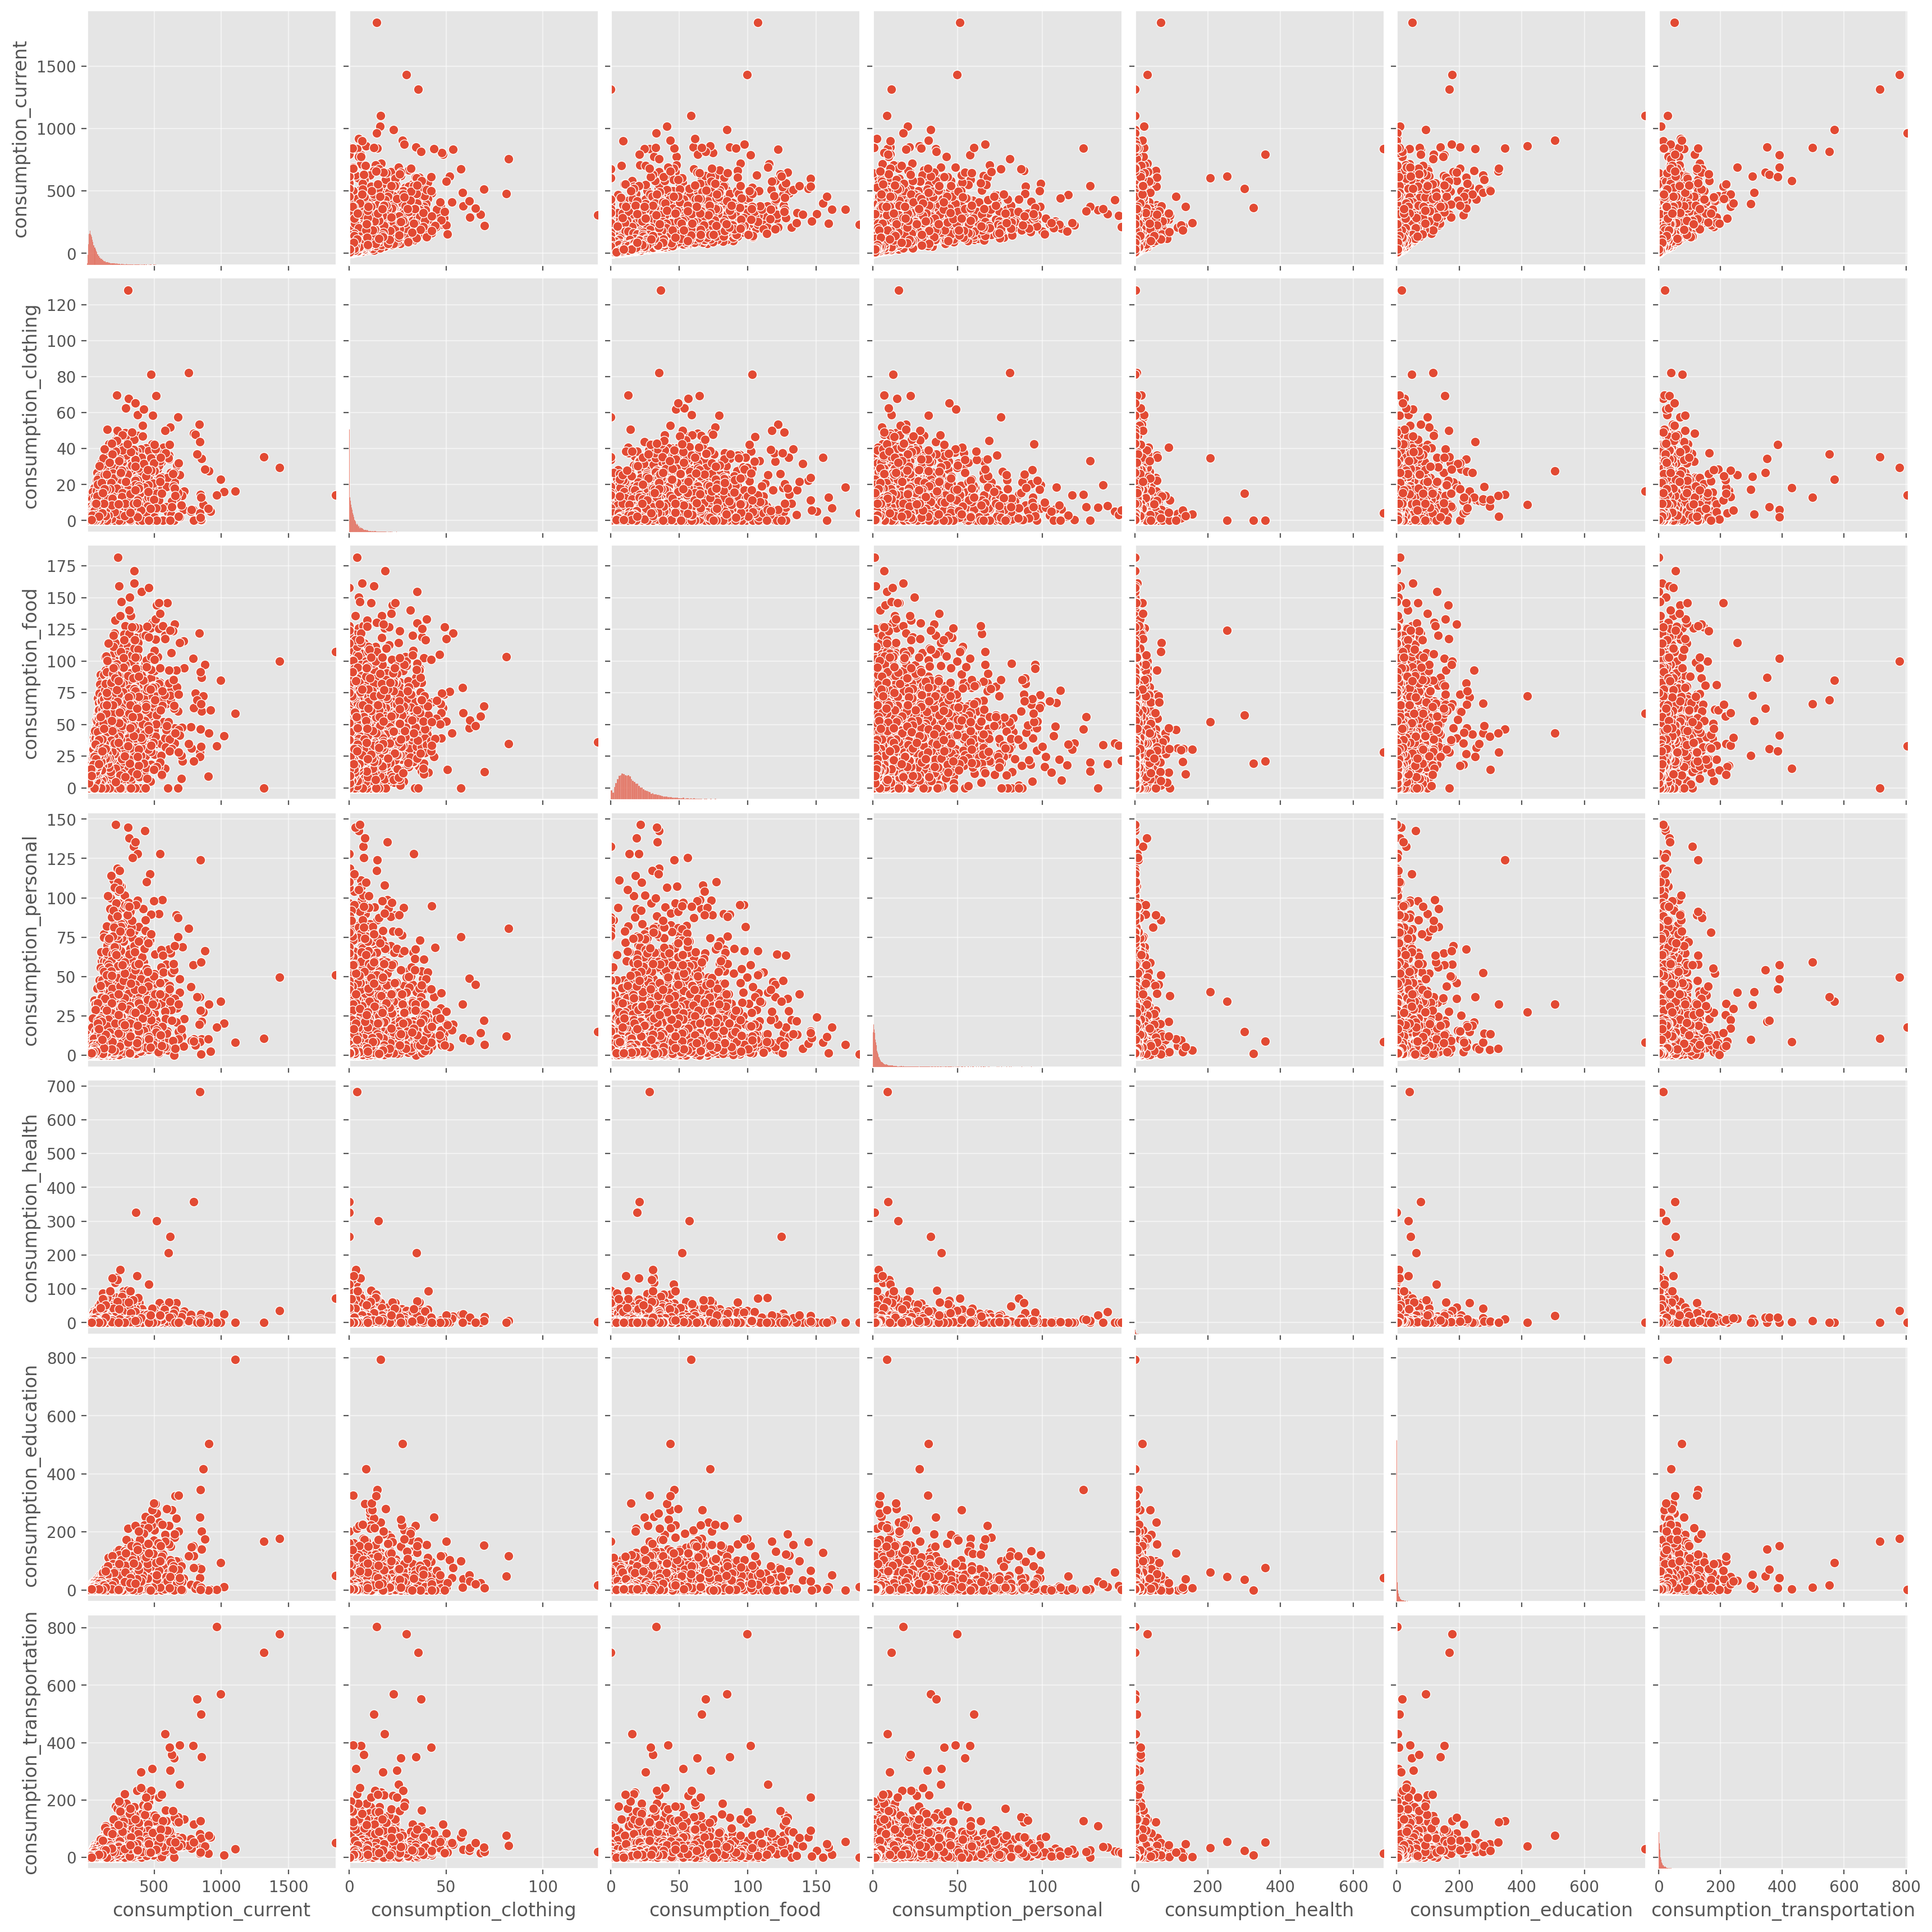

In [94]:
consumption_columns = ['consumption_current', 'consumption_clothing', 'consumption_food', 'consumption_personal', 'consumption_health', 'consumption_education', 'consumption_transportation']
sns.pairplot(df[consumption_columns])

/home/mitch/anaconda3/envs/main/lib/python3.9/site-packages/pandas/core/algorithms.py:1814: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(values, mapper, convert=convert)


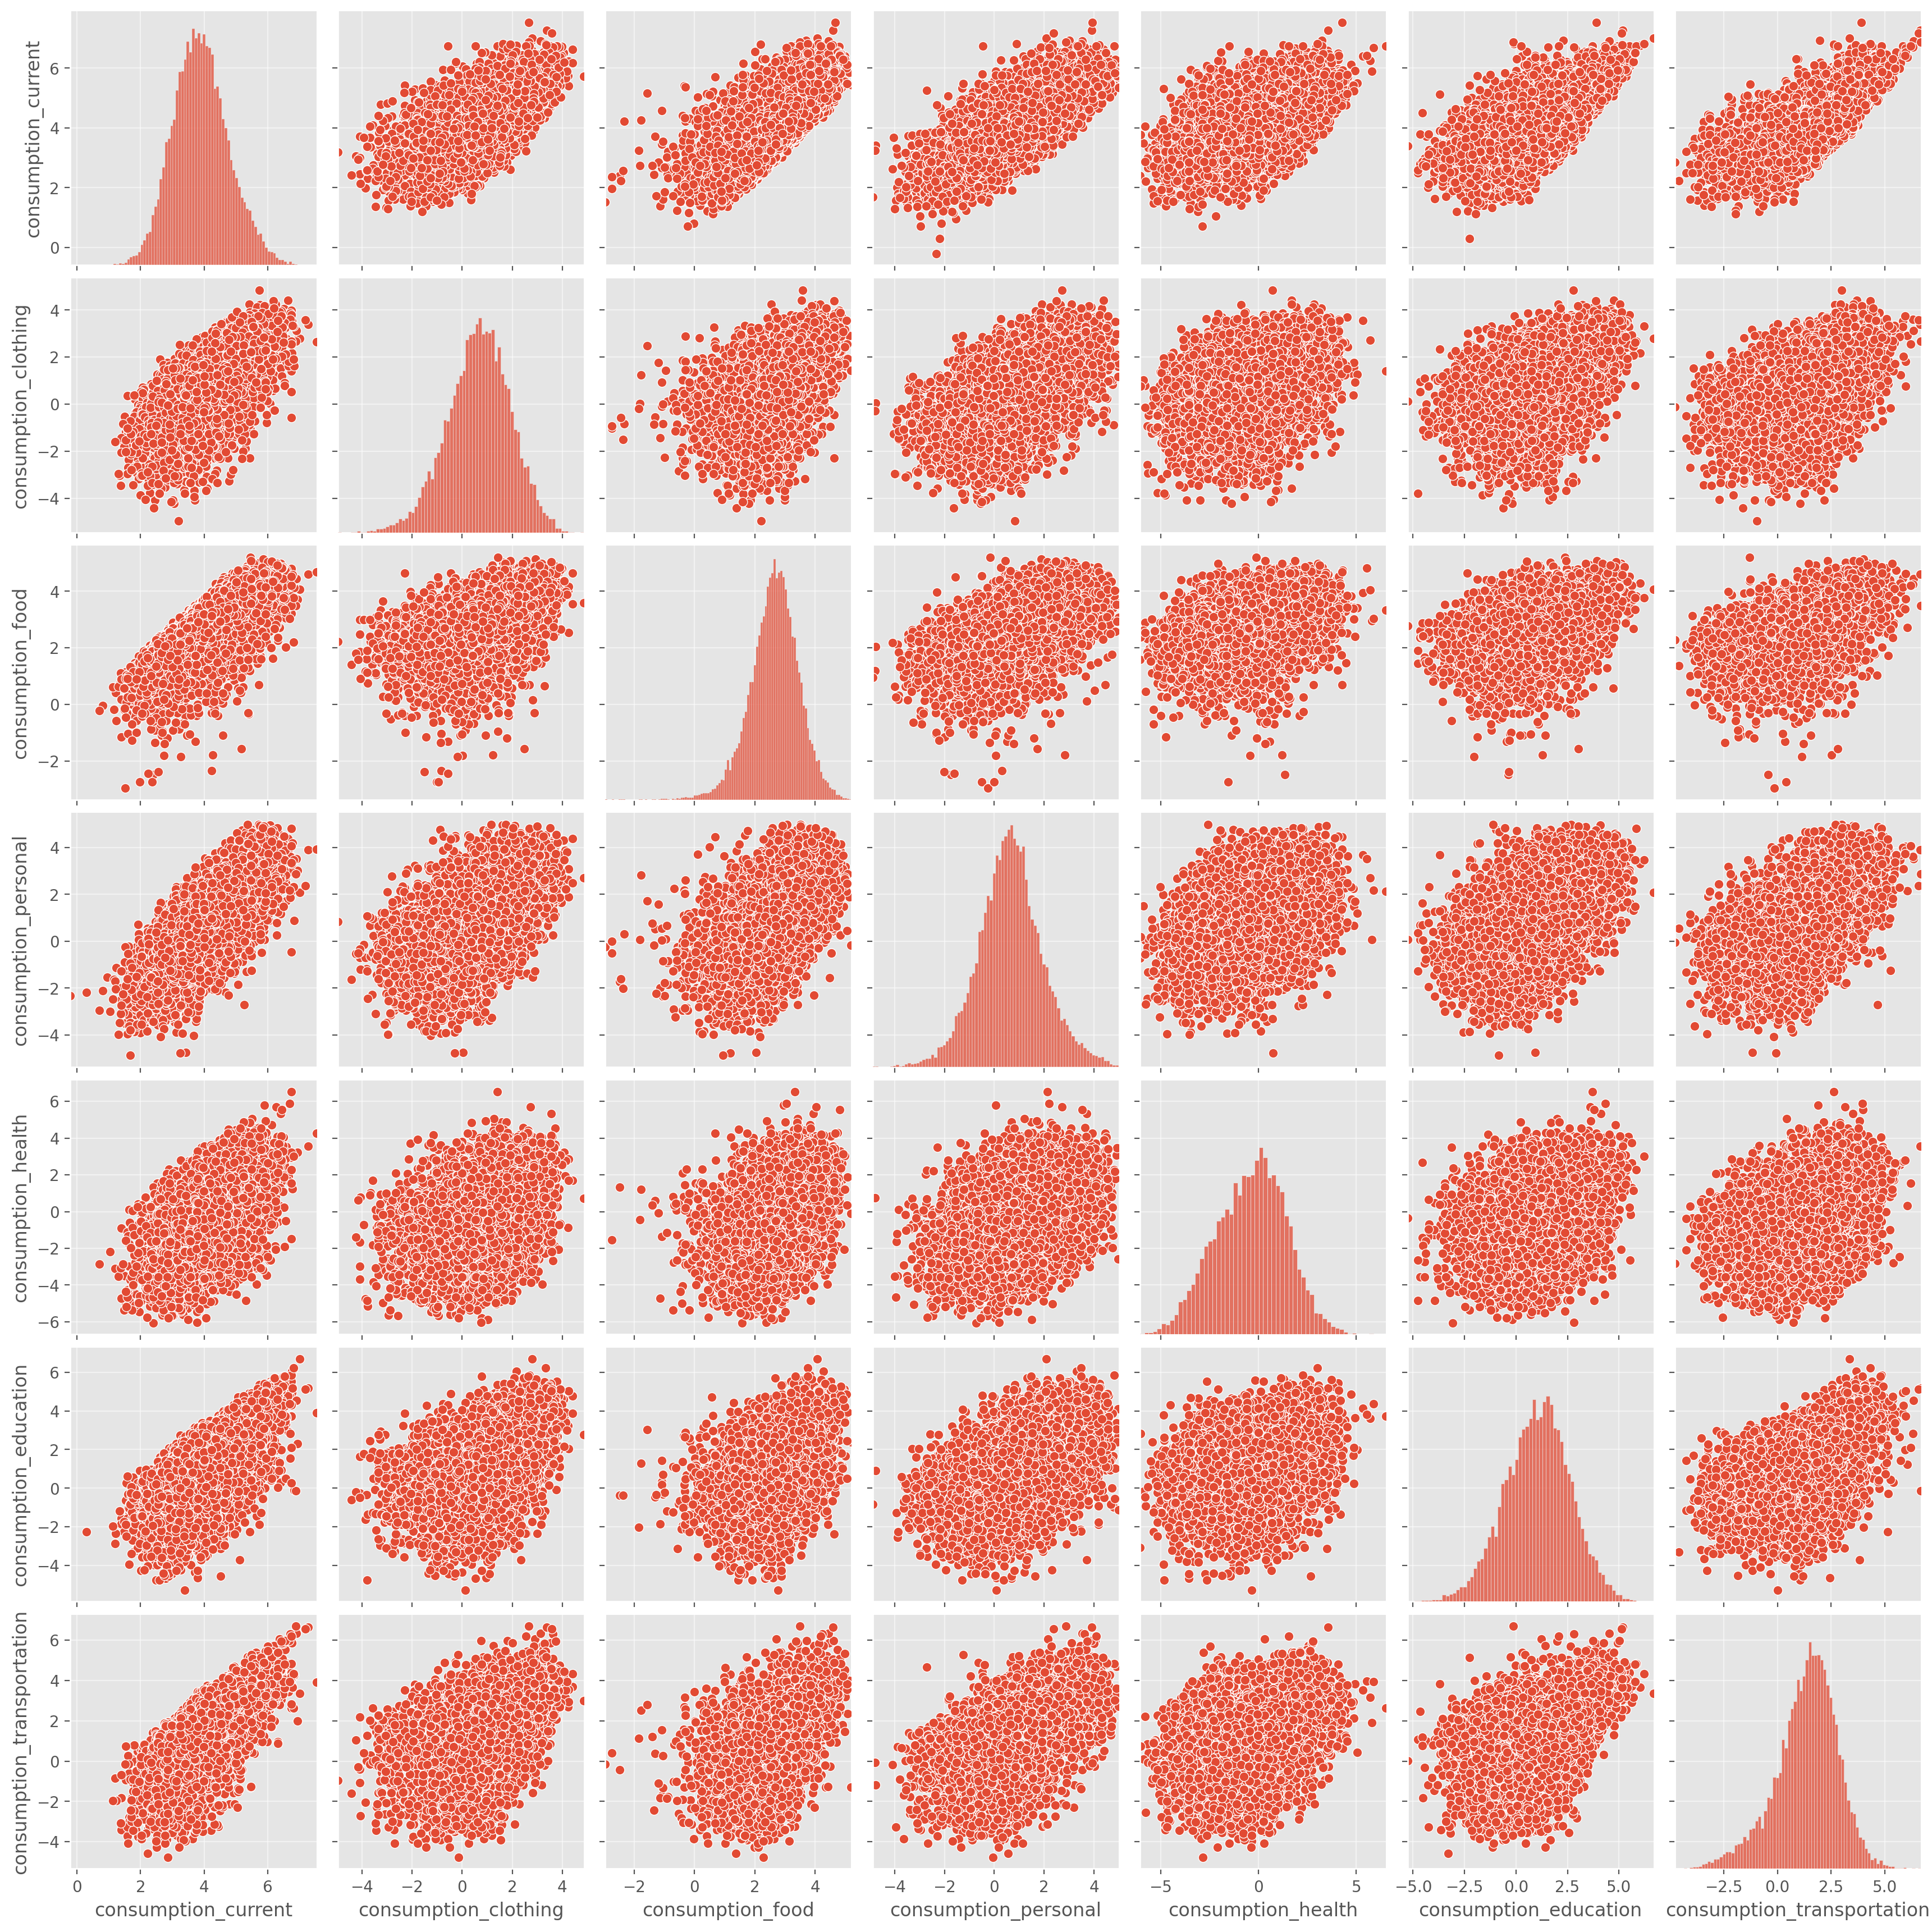

In [95]:
sns.pairplot(df[consumption_columns].map(np.log))

# Age

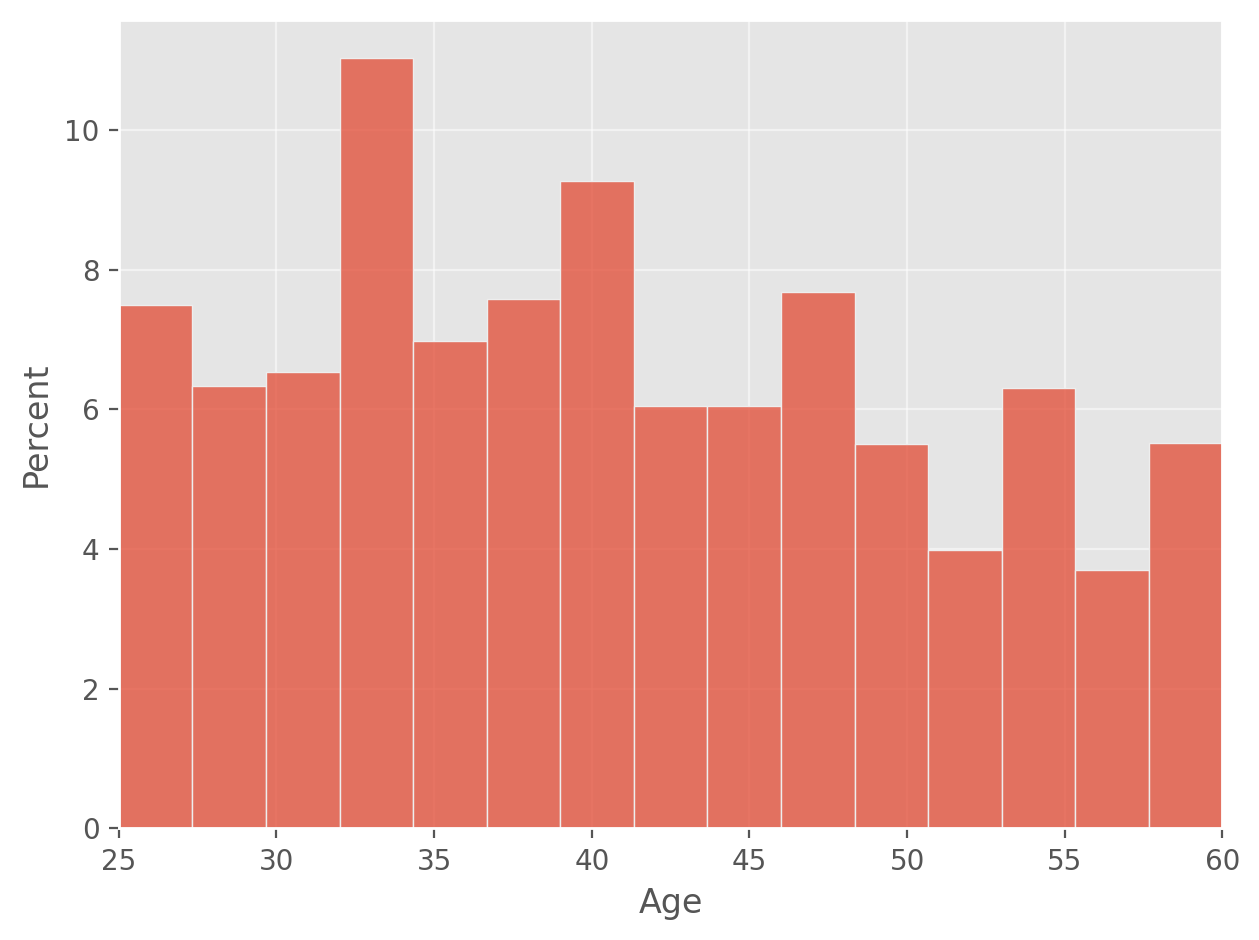

In [97]:
agebins = np.arange(df.age.min(), df.age.max()+5, 5)
plt.clf()
ax = sns.histplot(df, x = 'age', weights='weight', 
             bins=15,
             stat='percent')
ax.set_xlabel('Age')
plt.show()

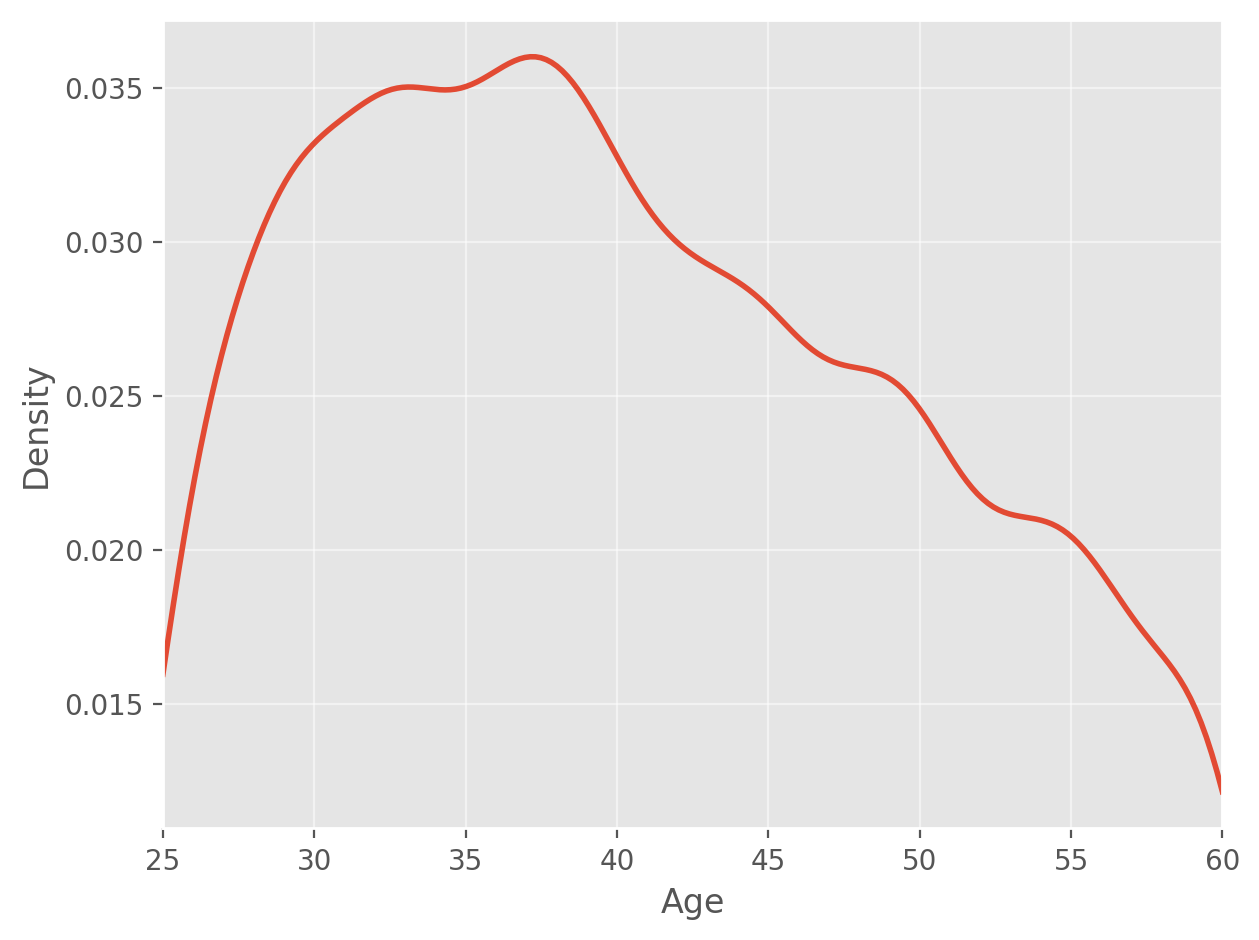

In [ ]:
plt.clf()
ax = sns.kdeplot(df, x = 'age', weights='weight',
                 clip = (df.age.min(), df.age.max()),
            linestyle='-')
ax.set_xlim(df.age.min(), df.age.max())
ax.set_xlabel('Age')
plt.show()